<!--BOOK_INFORMATION-->
<img align="left" src="" style="width: 76px; height: 100px; background: white; border: 1px solid black; margin-right:10px;">
*This notebook contains an excerpt from the upcoming book Machine Learning for OpenCV by Michael Beyeler.
The code is released under the [MIT license](https://opensource.org/licenses/MIT),
and is available on [GitHub](https://github.com/mbeyeler/opencv-machine-learning).*

*Note that this excerpt contains only the raw code - the book is rich with additional explanations and illustrations.
If you find this content useful, please consider supporting the work by
[buying the book](https://github.com/mbeyeler/opencv-machine-learning)!*

<!--NAVIGATION-->
< [None](06.00-Detecting-Pedestrians-with-Support-Vector-Machines.ipynb) | [Contents](../README.md) | [None](08.00-Discovering-Hidden-Structures-with-Unsupervised-Learning.ipynb) >

# Implementing Your First Bayesian Classifier

In [1]:
from sklearn import datasets
X, y = datasets.make_blobs(100, 2, centers=2, random_state=1701, cluster_std=2)

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

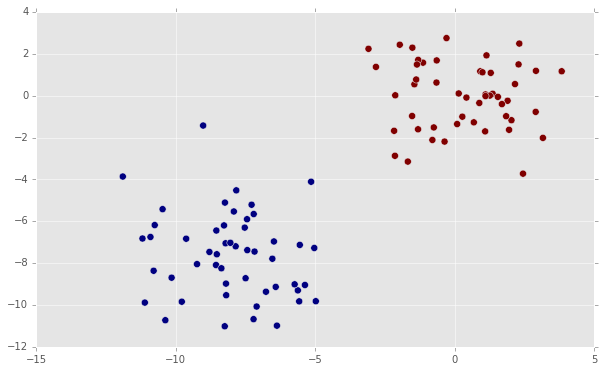

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

In [4]:
import numpy as np
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X.astype(np.float32),
                                                       y, test_size=0.1)

In [5]:
import cv2
model_norm = cv2.ml.NormalBayesClassifier_create()

In [6]:
model_norm.train(X_train, cv2.ml.ROW_SAMPLE, y_train)

True

In [7]:
_, y_pred = model_norm.predict(X_test)

In [8]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

1.0

In [9]:
def plot_decision_boundary(model, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    ret = model.predict(X_hypo)
    if isinstance(ret, tuple):
        zz = ret[1]
    else:
        zz = ret
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

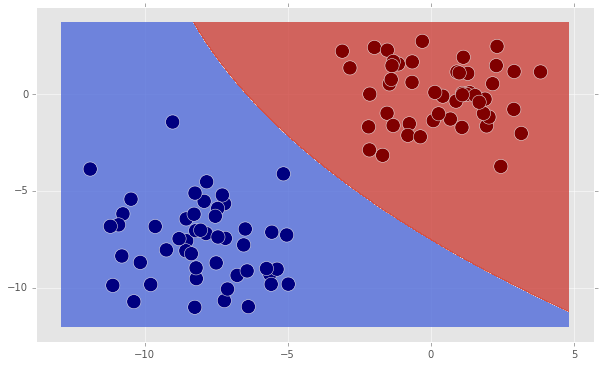

In [10]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(model_norm, X, y)

In [11]:
ret, y_pred, y_proba = model_norm.predictProb(X_test)

In [12]:
y_proba.round(2)

array([[ 0.17      ,  0.        ],
       [ 0.        ,  0.19      ],
       [ 0.        ,  0.07      ],
       [ 0.        ,  0.25999999],
       [ 0.        ,  0.        ],
       [ 0.14      ,  1.88      ],
       [ 0.        ,  0.        ],
       [ 0.        ,  1.88      ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ]], dtype=float32)

In [13]:
from sklearn import naive_bayes
model_naive = naive_bayes.GaussianNB()

In [14]:
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

In [15]:
model_naive.score(X_test, y_test)

1.0

In [16]:
yprob = model_naive.predict_proba(X_test)
yprob.round(2)

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]])

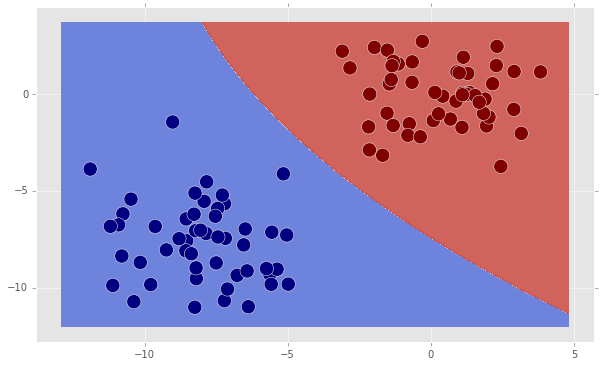

In [17]:
plt.figure(figsize=(10, 6))
plot_decision_boundary(model_naive, X, y)
plt.savefig('classify_sk.png')

In [18]:
def plot_proba(model, X_test, y_test):
    # create a mesh to plot in
    h = 0.02  # step size in mesh
    x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
    y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    X_hypo = np.c_[xx.ravel().astype(np.float32),
                   yy.ravel().astype(np.float32)]
    if hasattr(model, 'predictProb'):
        _, _, y_proba = model.predictProb(X_hypo)
    else:
        y_proba = model.predict_proba(X_hypo)
    
    zz = y_proba[:, 1] - y_proba[:, 0]
    zz = zz.reshape(xx.shape)
    
    plt.contourf(xx, yy, zz, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=200)

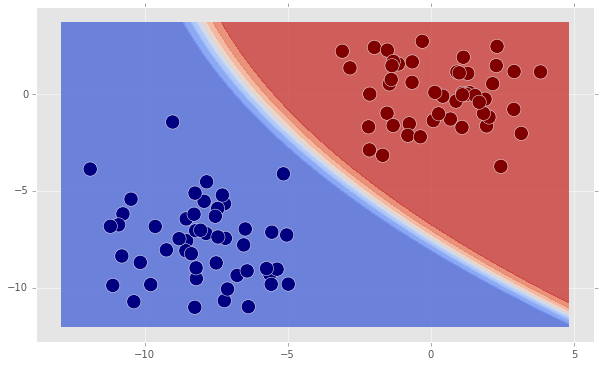

In [19]:
plt.figure(figsize=(10, 6))
plot_proba(model_naive, X, y)
plt.savefig('proba.png')

<!--NAVIGATION-->
< [None](06.00-Detecting-Pedestrians-with-Support-Vector-Machines.ipynb) | [Contents](../README.md) | [None](08.00-Discovering-Hidden-Structures-with-Unsupervised-Learning.ipynb) >